<a href="https://colab.research.google.com/github/rojasfery/MLOps_2024/blob/main/1er_entregable_proyecto_boot_camp_MLOps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-

# **ENTENDIMIENTO Y EXPLORACIÓN DEL DATASET**

-

In [6]:
################################################################################
##  Importación de liberías
################################################################################
# Importación de librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('--------\n-- ok --\n--------')

--------
-- ok --
--------


In [7]:
################################################################################
##  Lectura del dataset
################################################################################
# Carga del dataset
url = '/content/dataset.csv'  # URL del dataset
dataset = pd.read_csv(url, sep=';')

print('--------\n-- ok --\n--------')

--------
-- ok --
--------


In [8]:
################################################################################
##  Explorando datos
################################################################################
# Exploración inicial de los datos
print('-------- head()\n',dataset.head())
print('\n--------info()\n')
dataset.info()
print('\n--------describe()\n',dataset.describe())


-------- head()
    ID Motorway   SR  NR  TR  VR  SUR1  SUR2  SUR3  UR  ...  BR  MR  CR  \
0   1       A1  600   1   1   4     6     2    10   0  ...   0   0   1   
1   2       A1  700   1   5   1    10     6    10   3  ...   1   0   1   
2   3       A1  200   1   5   1    10     6    10   3  ...   1   0   1   
3   4       A1  300   1   5   0     6    10     2   3  ...   0   0   1   
4   5       A1  600   2   1   4    10     2     6   0  ...   5   0   1   

   Green frogs  Brown frogs  Common toad  Fire-bellied toad  Tree frog  \
0            0            0            0                  0          0   
1            0            1            1                  0          0   
2            0            1            1                  0          0   
3            0            0            1                  0          0   
4            0            1            1                  1          0   

   Common newt  Great crested newt  
0            0                   0  
1            1     

In [9]:
################################################################################
##  Definición de variables
################################################################################
# Variables agrupadas según la documentación del dataset

# Variables categóricas
vars_categorical = [
    "Motorway", "TR", "VR", "SUR1", "SUR2", "SUR3",
    "UR", "FR", "MR", "CR"
]

# Variables de etiquetas (podrían tratarse como categóricas)
vars_label = [
    "Green frogs", "Brown frogs", "Common toad",
    "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt"
]

# Variables númericas
vars_numerical = [
    "SR", "NR", "OR"  # Asumiendo que OR es numérico y no ordinal en tu caso
]

# Variables ordinales (podrían tratarse como númericas)
vars_ordinal = [
    "RR", "BR"
]

# Variables enteras (nos indica el orden de cada registro)
vars_integer = [
    "ID"
]

#print('--------\n-- ok --\n--------')
print('-------- Listas de varibales por tipo')
print('\n-------- Categóricas:',vars_categorical)
print('\n-------- Etiquetas:',vars_label)
print('\n-------- Numéricas:',vars_numerical)
print('\n-------- Ordinales:',vars_ordinal)
print('\n-------- Enteras:',vars_integer)

-------- Listas de varibales por tipo

-------- Categóricas: ['Motorway', 'TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR', 'FR', 'MR', 'CR']

-------- Etiquetas: ['Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt', 'Great crested newt']

-------- Numéricas: ['SR', 'NR', 'OR']

-------- Ordinales: ['RR', 'BR']

-------- Enteras: ['ID']


In [10]:
################################################################################
##  Cálculo de medidas estadísiticas básicas
################################################################################
# Creando data frame para variables númericas
stats_descriptive = pd.DataFrame()

# Obtención de estadísticas descriptivas para variables númericas
print('-------- Procesando:')
for column in vars_numerical + vars_ordinal:
  stats_descriptive[column] = dataset[column].describe()
  print(f'-------- {column}')

print("\n----------------------------------------------------------------------------\n")
print(f'--------Estadísticas descriptivas\n{stats_descriptive}')



-------- Procesando:
-------- SR
-------- NR
-------- OR
-------- RR
-------- BR

----------------------------------------------------------------------------

--------Estadísticas descriptivas
                  SR          NR          OR          RR          BR
count     189.000000  189.000000  189.000000  189.000000  189.000000
mean     9633.227513    1.566138   89.962963    2.333333    2.502646
std     46256.078309    1.544419   19.904926    2.520132    2.640971
min        30.000000    1.000000   25.000000    0.000000    0.000000
25%       300.000000    1.000000   99.000000    1.000000    1.000000
50%       700.000000    1.000000  100.000000    1.000000    1.000000
75%      3300.000000    1.000000  100.000000    5.000000    5.000000
max    500000.000000   12.000000  100.000000   10.000000   10.000000


-------- Procesando:
-------- Motorway
-------- TR
-------- VR
-------- SUR1
-------- SUR2
-------- SUR3
-------- UR
-------- FR
-------- MR
-------- CR
-------- Green frogs
-------- Brown frogs
-------- Common toad
-------- Fire-bellied toad
-------- Tree frog
-------- Common newt
-------- Great crested newt

----------------------------------------------------------------------------

--------Frecuencias de variables categóricas
     Motorway     TR    VR  SUR1  SUR2  SUR3     UR     FR     MR     CR  \
0         0.0    0.0  30.0   0.0   0.0   0.0  130.0  125.0  184.0    0.0   
1         0.0  116.0  55.0  43.0  36.0  29.0    9.0   16.0    1.0  186.0   
2         0.0    4.0  35.0  70.0  41.0  29.0    0.0   15.0    4.0    3.0   
3         0.0    0.0  41.0   0.0   0.0   0.0   50.0   18.0    0.0    0.0   
4         0.0    0.0  28.0   1.0   0.0   0.0    0.0   15.0    0.0    0.0   
5         0.0   12.0   0.0   0.0   0.0   2.0    0.0    0.0    0.0    0.0   
6         0.0    0.0   0.0  19.0 

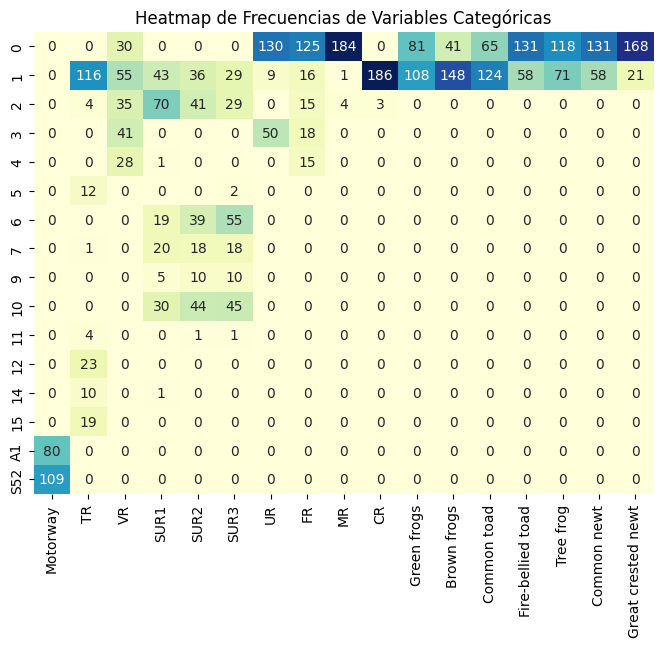

In [11]:
################################################################################
##  Obtención de frecuencias
################################################################################
# Creando diccionario para variables categóricas
freq_descriptive = {}

# Onbteniendo frecuencias para variables categóricas
print('-------- Procesando:')
for column in vars_categorical + vars_label:
    freq_descriptive[column] = dataset[column].value_counts()
    print(f'-------- {column}')

# Creando data frame del diccionario para mejor manejo
freq_descriptive_df = pd.DataFrame(freq_descriptive)
freq_descriptive_df.fillna(0, inplace=True) # Eliminando resultados NaN de los conteos por ceros

print("\n----------------------------------------------------------------------------\n")
print(f'--------Frecuencias de variables categóricas\n{freq_descriptive_df}')

print("\n----------------------------------------------------------------------------\n")
import seaborn as sns
import matplotlib.pyplot as plt

# Graficando el DataFrame de frecuencias
plt.figure(figsize=(8, 6))  # Ajuste del tamaño de la salida
sns.heatmap(freq_descriptive_df, annot=True, fmt=".0f", cmap="YlGnBu", cbar=False)
plt.title('Heatmap de Frecuencias de Variables Categóricas')
plt.show()



In [12]:
################################################################################
##  Identificando datos faltantes
################################################################################
# Contando valores faltantes por cada columna en el DataFrame original
valores_faltantes = dataset.isnull().sum()
print(valores_faltantes)

# Se había considerado introducir la media/mediana y moda para los diferentes tipos
# de variables, sin embargo, no fue necesario debido a los datos.

ID                    0
Motorway              0
SR                    0
NR                    0
TR                    0
VR                    0
SUR1                  0
SUR2                  0
SUR3                  0
UR                    0
FR                    0
OR                    0
RR                    0
BR                    0
MR                    0
CR                    0
Green frogs           0
Brown frogs           0
Common toad           0
Fire-bellied toad     0
Tree frog             0
Common newt           0
Great crested newt    0
dtype: int64


In [13]:
################################################################################
##  Identificando datos atípicos
################################################################################
# Identificación de datos atípicos utilizando el método del rango intercuartílico - IQR
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

# Definición de los límites para datos atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificación de valores fuera de los límites
outliers = (dataset < lower_bound) | (dataset > upper_bound) # dataframe booleano
outliers_count = outliers.sum()

print('\n-------- outliers_count\n')
outliers_count


-------- outliers_count



<ipython-input-13-d7c6c458e574>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataset.quantile(0.25)
<ipython-input-13-d7c6c458e574>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataset.quantile(0.75)
<ipython-input-13-d7c6c458e574>:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (dataset < lower_bound) | (dataset > upper_bound) # dataframe booleano


BR                     0
Brown frogs           41
CR                     3
Common newt            0
Common toad            0
FR                     0
Fire-bellied toad      0
Great crested newt    21
Green frogs            0
ID                     0
MR                     5
Motorway               0
NR                    41
OR                    46
RR                     0
SR                    29
SUR1                   0
SUR2                   0
SUR3                   0
TR                     0
Tree frog              0
UR                     0
VR                     0
dtype: int64

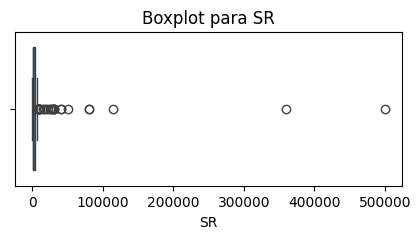

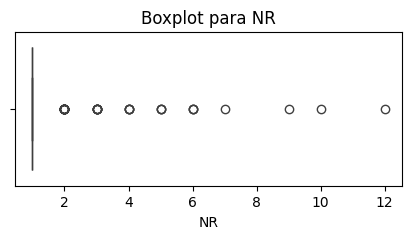

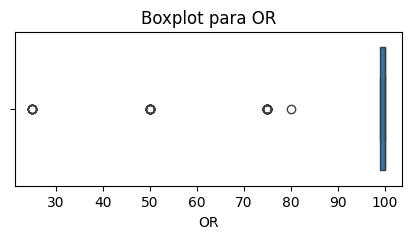

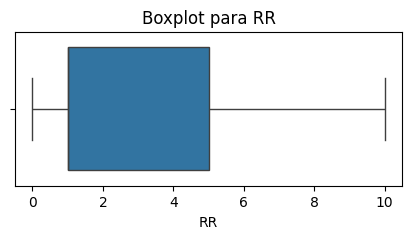

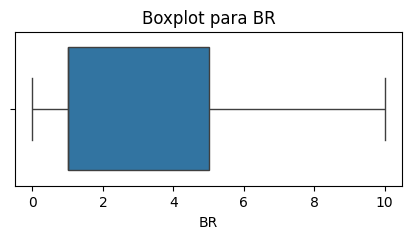

In [14]:
################################################################################
##  Visulizando los datos atípicos en variables númericas
################################################################################
import seaborn as sns
import matplotlib.pyplot as plt

# presentación de información por tipo de variable
for column in vars_numerical + vars_ordinal:
    plt.figure(figsize=(5, 2))  # Tamaño del gráfico
    sns.boxplot(x=dataset[column])
    plt.title(f'Boxplot para {column}')
    plt.show()


In [15]:
################################################################################
##  Visualizando valores outliers de variables continuas
################################################################################
# Filtra los valores atípicos para la variable 'SR'
outliers_sr = dataset['SR'][outliers['SR']]

# Filtra los valores atípicos para la variable 'OR'
outliers_or = dataset['OR'][outliers['OR']]

# Filtra los valores atípicos para la variable 'NR'
outliers_nr = dataset['NR'][outliers['NR']]

# Imprimir los valores para examinarlos más detalladamente
print("\n----------------------------------------------------------------------------")
print(f'Valores atípicos en SR:\n{outliers_sr}')
print("\n----------------------------------------------------------------------------")
print(f'Valores atípicos en OR:\n{outliers_or}')
print("\n----------------------------------------------------------------------------")
print(f'"Valores atípicos en NR:\n{outliers_nr}')


----------------------------------------------------------------------------
Valores atípicos en SR:
14       8000
15      30000
28      30000
40      80000
44      31000
46      25000
47      40000
58      28300
61       9000
62      19300
73       9100
84      10050
85       9000
90      16000
95      10000
96      10000
97      29000
98       8250
100     80000
102    500000
103     50000
104      8000
109      8300
135    115000
136     40000
140    360000
145     15000
153     26000
167     22000
Name: SR, dtype: int64

----------------------------------------------------------------------------
Valores atípicos en OR:
0      50
1      75
2      75
3      25
5      50
6      25
8      50
9      75
12     50
17     75
18     75
19     25
20     50
31     50
37     75
43     75
46     75
49     75
59     75
62     75
64     50
72     75
96     75
102    75
105    25
107    50
112    75
123    50
133    75
134    75
137    50
138    25
146    25
147    75
150    50
151    50
152    


----------------------------------------------------------------------------
-------- variable Motorway



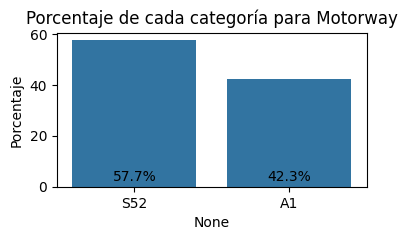


----------------------------------------------------------------------------
-------- variables categóricas



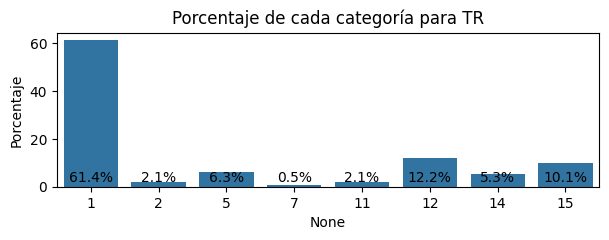

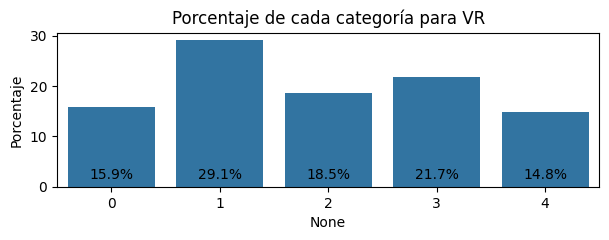

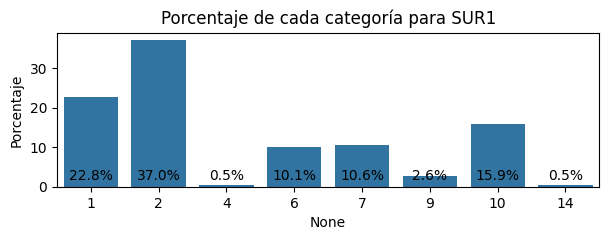

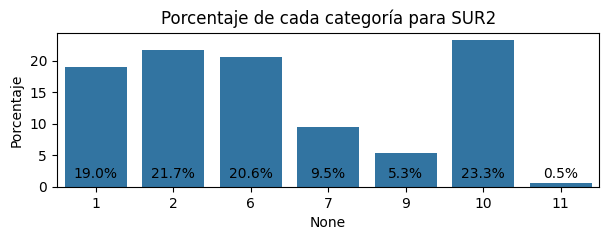

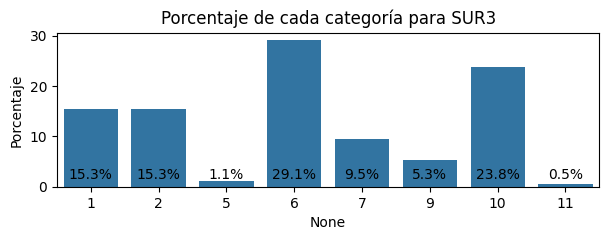

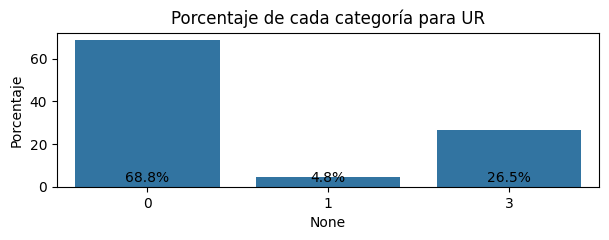

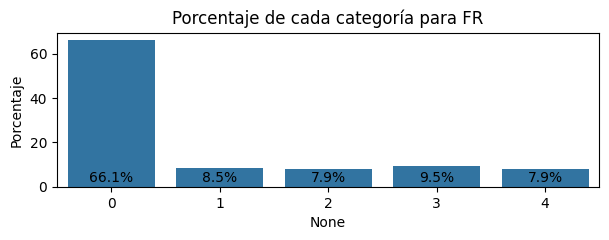

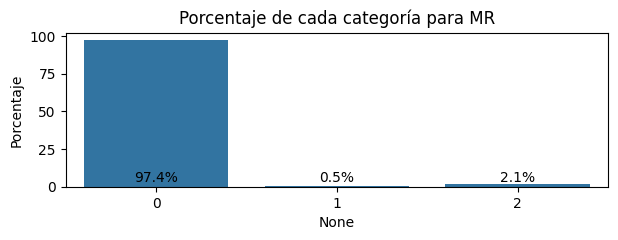

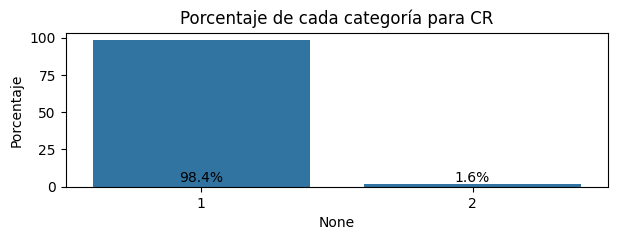


----------------------------------------------------------------------------
-------- variables de etiqueta



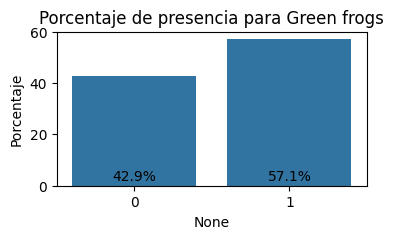

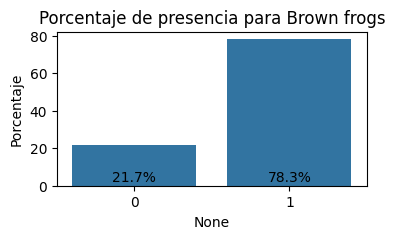

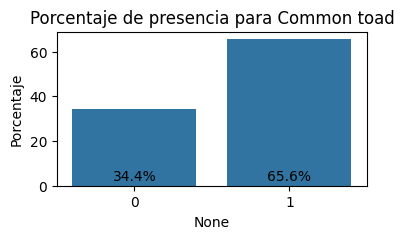

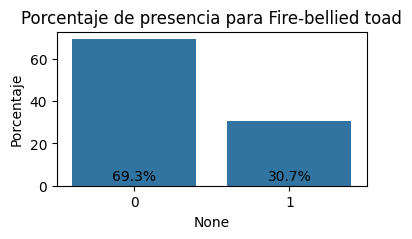

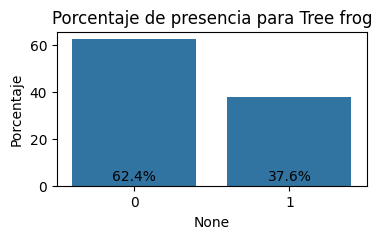

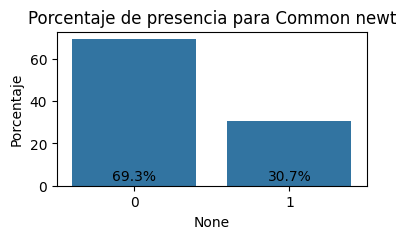

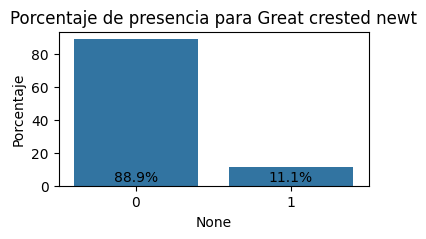


----------------------------------------------------------------------------



In [16]:
################################################################################
##  Visulizando los datos atípicos en variables categóricas
################################################################################
import seaborn as sns
import matplotlib.pyplot as plt

# Utilizando 'freq_descriptive_df' con las frecuencias ya calculadas
print("\n----------------------------------------------------------------------------")


print('-------- variable Motorway\n')
# Calcula las frecuencias relativas (porcentajes) de la variable 'Motorway'
motorway_freq = dataset['Motorway'].value_counts(normalize=True) * 100
# Gráfico de barras para 'Motorway'
plt.figure(figsize=(4, 2))
barplot = sns.barplot(x=motorway_freq.index, y=motorway_freq.values)

# Agregando etiquetas de porcentaje en cada barra
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}%',
                     (p.get_x() + p.get_width() / 2., 1),
                     ha = 'center', va = 'top',
                     xytext = (0, 10),
                     textcoords = 'offset points')

plt.title('Porcentaje de cada categoría para Motorway')
plt.ylabel('Porcentaje')
plt.show()
print("\n----------------------------------------------------------------------------")


print('-------- variables categóricas\n')
# Gráficos para las variables categóricas excepto Motorway
other_categorical_vars = ["TR", "VR", "SUR1", "SUR2", "SUR3", "UR", "FR", "MR", "CR"]
for var in other_categorical_vars:
  var_freq = dataset[var].value_counts(sort=False, normalize=True) * 100
  plt.figure(figsize=(7, 2))
  barplot= sns.barplot(x=var_freq.index, y=var_freq.values)

  # Agregando etiquetas de porcentaje en cada barra
  for p in barplot.patches:
      barplot.annotate(f'{p.get_height():.1f}%',
                      (p.get_x() + p.get_width() / 2., 1),
                      ha = 'center', va = 'top',
                      xytext = (0, 10),
                      textcoords = 'offset points')

  plt.title(f'Porcentaje de cada categoría para {var}')
  plt.ylabel('Porcentaje')
  plt.show()
print("\n----------------------------------------------------------------------------")


print('-------- variables de etiqueta\n')
# Gráficos para las variables de etiqueta (Aquí se podrán ver las clases)
label_vars = ["Green frogs", "Brown frogs", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt"]
for label in label_vars:
  label_freq = dataset[label].value_counts(normalize=True) * 100
  plt.figure(figsize=(4, 2))
  barplot = sns.barplot(x=label_freq.index, y=label_freq.values)

  # Agregando etiquetas de porcentaje en cada barra
  for p in barplot.patches:
      barplot.annotate(f'{p.get_height():.1f}%',
                      (p.get_x() + p.get_width() / 2., 1),
                      ha = 'center', va = 'top',
                      xytext = (0, 10),
                      textcoords = 'offset points')

  plt.title(f'Porcentaje de presencia para {label}')
  plt.ylabel('Porcentaje')
  plt.show()
print("\n----------------------------------------------------------------------------\n")


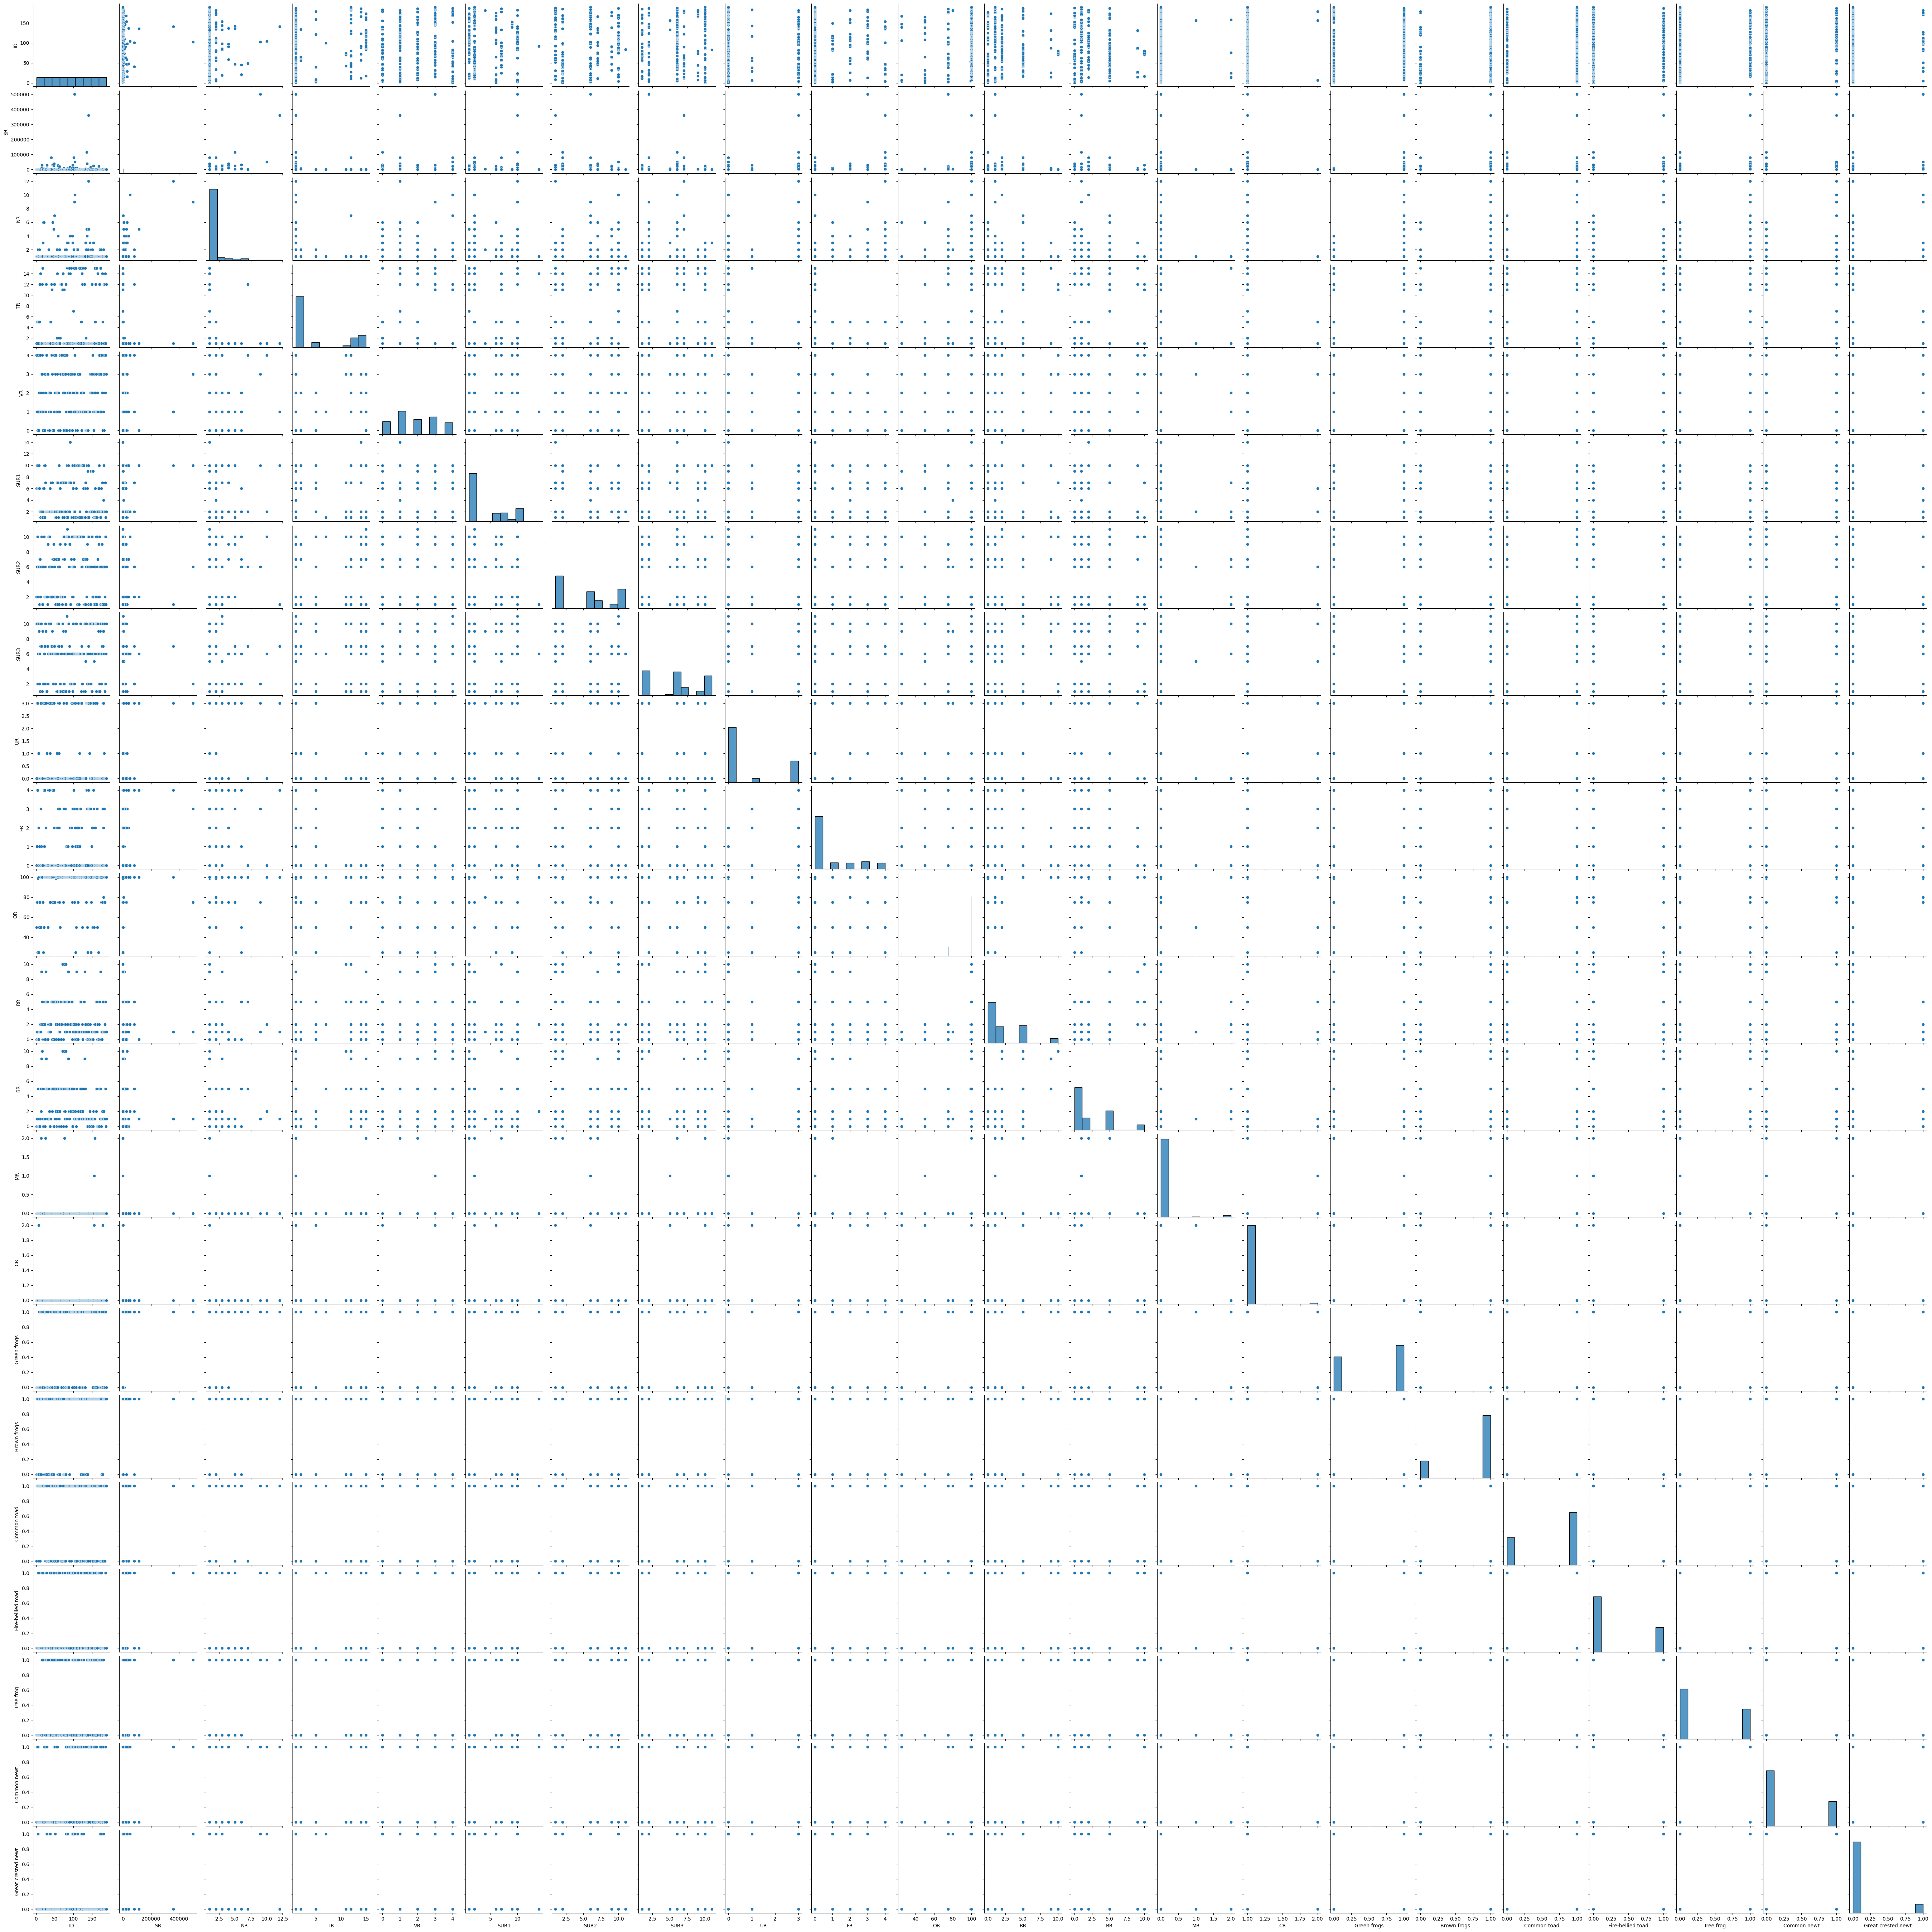

In [ ]:
################################################################################
##  Visualización de relaciones entre las variables
################################################################################
# Visualización de las relaciones entre variables
sns.pairplot(dataset.select_dtypes(include=['float64', 'int64']))
plt.show()


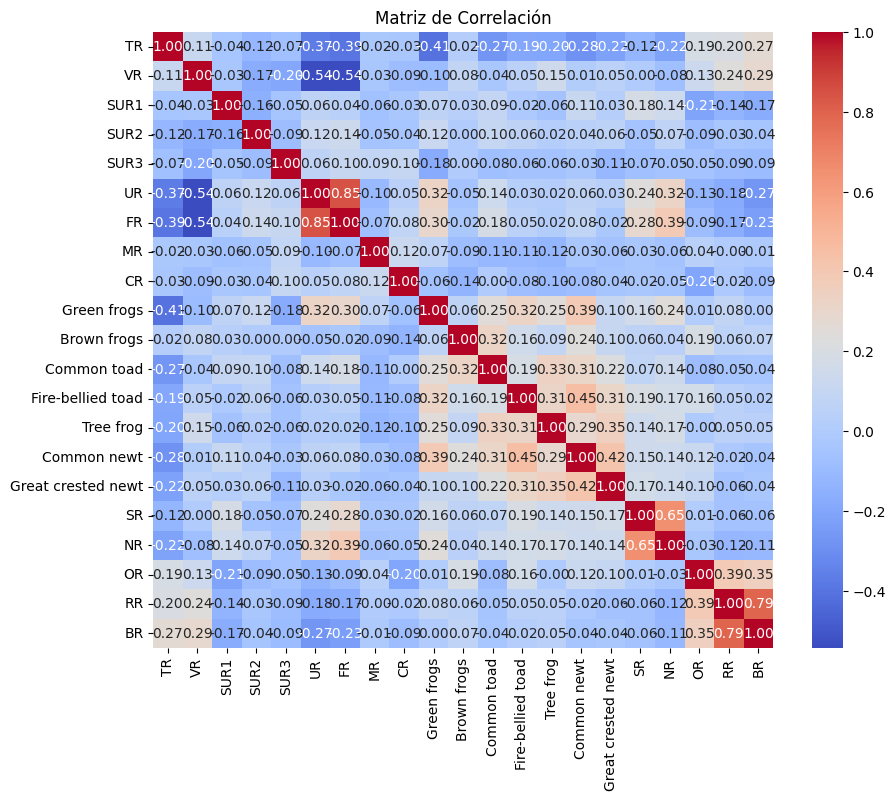

In [17]:
################################################################################
##  Obteniendo matriz de correlación
################################################################################
# matriz de correlación para variables sin considerar ID y Motorway

vars_categorical_ = [
    "TR", "VR", "SUR1", "SUR2", "SUR3",
    "UR", "FR", "MR", "CR"
]

corr_matrix = dataset[vars_categorical_ + vars_label + vars_numerical + vars_ordinal].corr()

# Visualizando la matriz de correlación usando Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

corr_matrix.to_csv('matriz_correlacion.csv')



In [18]:
################################################################################
##  Imprimiendo la matriz de correlaciones
################################################################################
#
print("\n----------------------------------------------------------------------------")
print('-------- Matriz de correlaciones\n')
print(corr_matrix)


----------------------------------------------------------------------------
-------- Matriz de correlaciones

                          TR        VR      SUR1      SUR2      SUR3  \
TR                  1.000000  0.112762 -0.042078 -0.117862 -0.072630   
VR                  0.112762  1.000000 -0.030341 -0.171089 -0.195974   
SUR1               -0.042078 -0.030341  1.000000 -0.160468 -0.047971   
SUR2               -0.117862 -0.171089 -0.160468  1.000000 -0.087872   
SUR3               -0.072630 -0.195974 -0.047971 -0.087872  1.000000   
UR                 -0.373549 -0.542904  0.062386  0.117055  0.061688   
FR                 -0.394966 -0.537696  0.041018  0.137161  0.103372   
MR                 -0.024263 -0.029142 -0.063092 -0.053637  0.089369   
CR                 -0.029283 -0.087452 -0.033348 -0.038333  0.096352   
Green frogs        -0.406217 -0.095322  0.065099  0.115015 -0.178557   
Brown frogs         0.020830  0.079093  0.032023  0.003855  0.001923   
Common toad        -0.26

In [19]:
################################################################################
##  Estableciendo umbrales para las relaciones fuertes entre variables
################################################################################
#
import pandas as pd

# Para cargar la matriz de correlación en caso de no estar en memoria
# corr_matrix = pd.read_csv('/content/matriz_correlacion.csv')

# Definiendo los umbrales
pos_threshold = 0.5  # Para correlaciones positivas fuertes
neg_threshold = -0.27  # Para correlaciones negativas fuertes

# Filtrando las correlaciones fuertes
strong_pos_corrs = corr_matrix[(corr_matrix > pos_threshold) & (corr_matrix < 1)].stack().reset_index()
strong_neg_corrs = corr_matrix[corr_matrix < neg_threshold].stack().reset_index()

# Combinando las correlaciones fuertes positivas y negativas
strong_corrs = pd.concat([strong_pos_corrs, strong_neg_corrs])

# Renombrando columnas
strong_corrs.columns = ['Variable1', 'Variable2', 'Correlation']

# Eliminando duplicados
strong_corrs = strong_corrs[strong_corrs['Variable1'] != strong_corrs['Variable2']].drop_duplicates()

# Filtrando correlaciones significativas
strong_corrs_filtered = strong_corrs[abs(strong_corrs['Correlation']) > 0 ].reset_index()

# Imprimiendo las correlaciones fuertes
print("\n----------------------------------------------------------------------------")
print('-------- Correlaciones fuertes\n')
print(strong_corrs_filtered)




----------------------------------------------------------------------------
-------- Correlaciones fuertes

    index    Variable1    Variable2  Correlation
0       0           UR           FR     0.846052
1       1           FR           UR     0.846052
2       2           SR           NR     0.652757
3       3           NR           SR     0.652757
4       4           RR           BR     0.792273
5       5           BR           RR     0.792273
6       0           TR           UR    -0.373549
7       1           TR           FR    -0.394966
8       2           TR  Green frogs    -0.406217
9       3           TR  Common newt    -0.278239
10      4           VR           UR    -0.542904
11      5           VR           FR    -0.537696
12      6           UR           TR    -0.373549
13      7           UR           VR    -0.542904
14      8           FR           TR    -0.394966
15      9           FR           VR    -0.537696
16     10  Green frogs           TR    -0.406217
17     1

In [20]:
################################################################################
##  Filtrando los pares de valores únicos
################################################################################
#

# Ordenando alfabéticamente los nombres de las variables en cada fila para combinarlas
strong_corrs['Variable Pair'] = strong_corrs.apply(lambda x: '-'.join(sorted([x['Variable1'], x['Variable2']])), axis=1)

# Eliminando duplicados basados en 'Variable Pair'
strong_corrs_unique = strong_corrs.drop_duplicates(subset=['Variable Pair'], keep='first')

# Eliminando la columna 'Variable Pair'
# strong_corrs_unique = strong_corrs_unique.drop(columns=['Variable Pair'])

# Imprimiendo las correlaciones fuertes
print("\n----------------------------------------------------------------------------")
print('-------- Correlaciones fuertes - valores únicos \n')
print(strong_corrs_unique)





----------------------------------------------------------------------------
-------- Correlaciones fuertes - valores únicos 

  Variable1    Variable2  Correlation   Variable Pair
0        UR           FR     0.846052           FR-UR
2        SR           NR     0.652757           NR-SR
4        RR           BR     0.792273           BR-RR
0        TR           UR    -0.373549           TR-UR
1        TR           FR    -0.394966           FR-TR
2        TR  Green frogs    -0.406217  Green frogs-TR
3        TR  Common newt    -0.278239  Common newt-TR
4        VR           UR    -0.542904           UR-VR
5        VR           FR    -0.537696           FR-VR


-

# **IMPLEMENTACIÓN DE MODELOS**

-

In [25]:
################################################################################
##  Carga de Data Frame con datos necesarios para el modelo
################################################################################
#
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Carga del dataset en caso de que no esté disponible por el entorno de ejecución
# df = pd.read_csv('path/to/your/dataset.csv')

print("----------------------------------------------------------------------------")
print('-------- Dataframe con variables de interés, sin Motorway ni ID \n')
df = dataset[vars_categorical_ + vars_label + vars_numerical + vars_ordinal]
print(df)

----------------------------------------------------------------------------
-------- Dataframe con variables de interés, sin Motorway ni ID 

     TR  VR  SUR1  SUR2  SUR3  UR  FR  MR  CR  Green frogs  ...  Common toad  \
0     1   4     6     2    10   0   0   0   1            0  ...            0   
1     5   1    10     6    10   3   1   0   1            0  ...            1   
2     5   1    10     6    10   3   4   0   1            0  ...            1   
3     5   0     6    10     2   3   4   0   1            0  ...            1   
4     1   4    10     2     6   0   0   0   1            0  ...            1   
..   ..  ..   ...   ...   ...  ..  ..  ..  ..          ...  ...          ...   
184  12   3     2     2     1   0   0   0   1            0  ...            0   
185  14   2     7    10     2   0   0   0   1            1  ...            1   
186   1   4     1    10     2   0   0   0   1            1  ...            1   
187  12   3     2     1     6   0   0   0   1            

In [38]:
################################################################################
##  Preparar datos para el modelo
################################################################################
#
# Definiendo características y etiquetas

# Características:
features = df.drop([ 'Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt', 'Great crested newt'], axis=1)

# Etiquetas:
labels = df[['Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt', 'Great crested newt']]

X = features
y = labels

print('--------\n-- ok --\n--------')

--------
-- ok --
--------


In [39]:
################################################################################
##  Estandariazación de variables
################################################################################
#
# Codificación de variables categóricas y escalamiento de numéricas
categorical_features = ['TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR', 'FR', 'MR', 'CR']
numerical_features = ['SR', 'NR', 'OR', 'RR', 'BR']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# División de los datos en conjuntos de entrenamiento y prueba - General
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar el preprocesador a las características
preprocessor.fit(X_train)
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print('--------\n-- ok --\n--------')

--------
-- ok --
--------


In [56]:
################################################################################
##  K-Vecinos más cercanos - KNN
################################################################################
#
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

precisions_knn = {}
metrics_knn = []

# Inicializando clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Usar MultiOutputClassifier para manejar múltiples etiquetas con KNN
multioutput_clf = MultiOutputClassifier(knn, n_jobs=-1)

# Entrenando el modelo con los datos preprocesados
multioutput_clf.fit(X_train_preprocessed, y_train)

# Realizando predicciones en el conjunto de prueba
y_pred = multioutput_clf.predict(X_test_preprocessed)

# Evaluando el modelo
for i, col in enumerate(labels.columns):
  print("\n----------------------------------------------------------------------------")
  print(f"-------- Evaluación del modelo (KNN) para {col}:")
  print(classification_report(y_test[col], y_pred[:, i]))
  print("-------- Accuracy:", accuracy_score(y_test, y_pred), "\n")
  #precisions_knn[col] = accuracy_score(y_test[col], y_pred[:, i])
  #report = classification_report(y_test[label], y_pred, output_dict=True)
  report = classification_report(y_test[col], y_pred[:, i], output_dict=True)
  metrics_knn.append({
        'Etiqueta': col,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score'],
        'Accuracy': accuracy_score(y_test, y_pred)
    })



----------------------------------------------------------------------------
-------- Evaluación del modelo (KNN) para Green frogs:
              precision    recall  f1-score   support

           0       0.52      0.65      0.58        17
           1       0.65      0.52      0.58        21

    accuracy                           0.58        38
   macro avg       0.59      0.59      0.58        38
weighted avg       0.59      0.58      0.58        38

-------- Accuracy: 0.07894736842105263 


----------------------------------------------------------------------------
-------- Evaluación del modelo (KNN) para Brown frogs:
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         8
           1       0.81      0.87      0.84        30

    accuracy                           0.74        38
   macro avg       0.57      0.56      0.56        38
weighted avg       0.71      0.74      0.72        38

-------- Accuracy: 0.07894736842105263 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [53]:
################################################################################
##  Regresión Lógistica Múltiple - RLM
################################################################################
#
modelosRLM = {}
precisions_rlm = {}
metrics_rlm= []

# Iterando sobre cada etiqueta (especie de rana)
for label in y_train.columns:
  # Extrae la columna de etiqueta específica para entrenamiento y prueba
  y_train_ = y_train[label]
  y_test_ = y_test[label]

  # Entrenar el modelo de regresión logística para la etiqueta actual
  modelo = LogisticRegression(solver='lbfgs', max_iter=1000)
  modelo.fit(X_train_preprocessed, y_train_)

  # Guardar el modelo entrenado en el diccionario
  modelosRLM[label] = modelo

  # Realizar predicciones y evaluar
  print("\n----------------------------------------------------------------------------")
  y_pred = modelo.predict(X_test_preprocessed)
  print(f"-------- Reporte de clasificación para {label}:\n")
  print(classification_report(y_test_, y_pred))
  print("-------- Accuracy:", accuracy_score(y_test_, y_pred), "\n")
  #precisions_rlm[label] = accuracy_score(y_test[label], modelosRLM[label].predict(X_test_preprocessed))
  report = classification_report(y_test[label], y_pred, output_dict=True)
  metrics_rlm.append({
        'Etiqueta': label,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score'],
        'Accuracy': accuracy_score(y_test_, y_pred)
    })

print('--------\n-- ok --\n--------')



----------------------------------------------------------------------------
-------- Reporte de clasificación para Green frogs:

              precision    recall  f1-score   support

           0       0.71      0.59      0.65        17
           1       0.71      0.81      0.76        21

    accuracy                           0.71        38
   macro avg       0.71      0.70      0.70        38
weighted avg       0.71      0.71      0.71        38

-------- Accuracy: 0.7105263157894737 


----------------------------------------------------------------------------
-------- Reporte de clasificación para Brown frogs:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.76      0.87      0.81        30

    accuracy                           0.68        38
   macro avg       0.38      0.43      0.41        38
weighted avg       0.60      0.68      0.64        38

-------- Accuracy: 0.6842105263157895 


---

In [59]:
################################################################################
##  Presentando métricas
################################################################################
#
print("\n----------------------------------------------------------------------------")
print("-------- Métricas (KNN):")
print(metrics_knn)

print("\n----------------------------------------------------------------------------")
print("-------- Métricas (RLM):")
print(metrics_rlm)

print('--------\n-- ok --\n--------')



----------------------------------------------------------------------------
-------- Métricas (KNN):
[{'Etiqueta': 'Green frogs', 'Precision': 0.591920978917883, 'Recall': 0.5789473684210527, 'F1-Score': 0.5789473684210527, 'Accuracy': 0.07894736842105263}, {'Etiqueta': 'Brown frogs', 'Precision': 0.7116228070175439, 'Recall': 0.7368421052631579, 'F1-Score': 0.7222895949551298, 'Accuracy': 0.07894736842105263}, {'Etiqueta': 'Common toad', 'Precision': 0.49404761904761907, 'Recall': 0.5, 'F1-Score': 0.4966984592809977, 'Accuracy': 0.07894736842105263}, {'Etiqueta': 'Fire-bellied toad', 'Precision': 0.7169536745088528, 'Recall': 0.7368421052631579, 'F1-Score': 0.724780701754386, 'Accuracy': 0.07894736842105263}, {'Etiqueta': 'Tree frog', 'Precision': 0.47474747474747475, 'Recall': 0.5, 'F1-Score': 0.47921390778533635, 'Accuracy': 0.07894736842105263}, {'Etiqueta': 'Common newt', 'Precision': 0.8421052631578947, 'Recall': 0.8421052631578947, 'F1-Score': 0.8421052631578947, 'Accuracy': 0

In [60]:
################################################################################
##  Almacenando métricas
################################################################################
#
# Creando data frames
df_metrics_knn = pd.DataFrame(metrics_knn)
df_metrics_rlm = pd.DataFrame(metrics_rlm)

# Agregando identificadores a las columnas
df_metrics_knn = df_metrics_knn.add_prefix('KNN_')
df_metrics_rlm = df_metrics_rlm.add_prefix('RLM_')

# Renombrando columna 'Etiqueta' para combinarlas
df_metrics_knn.rename(columns={'KNN_Etiqueta': 'Etiqueta'}, inplace=True)
df_metrics_rlm.rename(columns={'RLM_Etiqueta': 'Etiqueta'}, inplace=True)

# Combinar los DataFrames en uno solo
df_metrics_combined = pd.merge(df_metrics_knn, df_metrics_rlm, on='Etiqueta')

# Exportar el DataFrame combinado a un archivo CSV
df_metrics_combined.to_csv('metricas_modelos_combined.csv', index=False)

print('--------\n-- ok --\n--------')


--------
-- ok --
--------


In [ ]:
################################################################################
##  TEXTO
################################################################################
#


In [ ]:
################################################################################
##  TEXTO
################################################################################
#


In [ ]:
################################################################################
##  TEXTO
################################################################################
#


In [ ]:
################################################################################
##  TEXTO
################################################################################
#


In [ ]:
################################################################################
##  TEXTO
################################################################################
#


In [ ]:
################################################################################
##  TEXTO
################################################################################
#


In [ ]:
################################################################################
##  TEXTO
################################################################################
#


In [ ]:
################################################################################
##  TEXTO
################################################################################


In [ ]:
################################################################################
##  TEXTO
################################################################################


In [ ]:
################################################################################
##  TEXTO
################################################################################


In [ ]:
################################################################################
##  TEXTO
################################################################################


In [ ]:
################################################################################
##  TEXTO
################################################################################
